\

<center><img src='https://miro.medium.com/v2/resize:fit:1110/format:webp/0*_StcBTZ5vMzKPP0B.' height=300px width=600px /></center>

<div style="border-radius:10px; padding: 12px; background-color: #; font-size:130%; text-align:left">

<p style="color: #E1B12D; font-family: 'verdana'; font-size: 20px; font-weight: bold;">Introduction</p>
Customer satisfaction score (CSAT) is a metric used to evaluate the satisfaction level of customers with the products or services provided by a business. In the context of e-commerce, CSAT plays a crucial role in gauging the quality of customer service and overall experience. It measures how well the company meets customer expectations and fulfills their needs, ultimately influencing customer loyalty, retention, and brand reputation.<br>
    </div>
<div style="border-radius:10px; padding: 12px; background-color: #; font-size:130%; text-align:left">
<p style="color: #E1B12D; font-family: 'verdana'; font-size: 20px; font-weight: bold;">Importance of CSAT in E-commerce: </p>
In the highly competitive e-commerce landscape, where customers have numerous options at their fingertips, ensuring high levels of customer satisfaction is paramount. CSAT provides valuable insights into areas of improvement, identifies pain points in the customer journey, and helps in prioritizing efforts to enhance customer experience. By monitoring CSAT scores, e-commerce businesses can proactively address issues, refine their offerings, and build long-term relationships with customers.<br>
    </div>
<div style="border-radius:10px; padding: 12px; background-color: #; font-size:130%; text-align:left">
<p style="color: #E1B12D; font-family: 'verdana'; font-size: 20px; font-weight: bold;">Objectives of the Notebook: </p>
The primary objective of this notebook is to analyze the CSAT trends and patterns within an e-commerce dataset. Specifically, we aim to:<br>

- Analyze CSAT trends and patterns in e-commerce data.<br>
- Visualize relationships between factors and CSAT scores.<br>
- Analyze scores across agents, supervisors, categories, etc.<br>
- Explore CSAT score trends for recurring patterns.<br>
- Identify factors influencing CSAT scores.<br>
- Provide recommendations to enhance customer satisfaction.<br>
- Train 4 different Machine Learning  ALgorithm models and then ensemble them with it having a predictive system to classify customer behavior .<br>
    </div>





## **Below is Gruop Five Team members**


```
* Clinton Mongare  P101/1382G/20
* Chrisropher Mugo P101/1370G/20
* Samuel Kiando    P101/1372G/20
* Gavin Njoroge    P101/1374G/20
* Evans Kiptoo     P101/1978G/20
* Robert Munyao    P101/0843G/18
* Thomas Wabwile   P101/1453G/20
* Colman Macharia  P101/0899G/20
```



## **Below is Breakdown of our task**

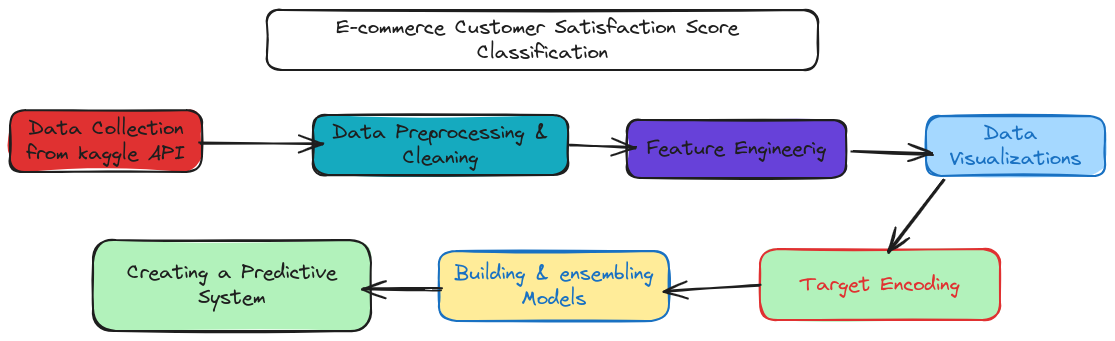

In [ ]:
#instllation of Libraries
!pip install kaggle
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


# **Data Collection from Kaggle API**

In [ ]:
#Upload kaggle json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"itskiash","key":"a5f5bc02c9c1cb367b64184b97e2eeeb"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'


In [ ]:
#dOwnload the dataset using kaggle API
!kaggle datasets download -d ddosad/ecommerce-customer-service-satisfaction

 64% 4.00M/6.26M [00:00<00:00, 15.4MB/s]
100% 6.26M/6.26M [00:00<00:00, 18.0MB/s]


In [ ]:
import zipfile
import os

zip_path = '/content/ecommerce-customer-service-satisfaction.zip'
extract_path = '/content/ecommerce-customer-service-satisfaction'

# Create a directory to extract the files
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


Extracted files: ['Customer_support_data.csv']


In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

# **Data Loading**

In [ ]:
#load the extrated dataset
data=pd.read_csv("/content/ecommerce-customer-service-satisfaction/Customer_support_data.csv")

# **Data Prepocessing And Cleaning**

In [ ]:
#check the first five rows of the dataset
data.head(5)

Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-44cb-beaf-62d6fd6c00d5             NaN  01/08/2023 20:16   
3  5aed0059-55a4-4ec6-bb54-97942092020a             NaN  01/08/2023 20:56   
4  e8bed5a9-6933-4aff-9dc6-ccefd7dcde59             NaN  01/08/2023 10:30   

    issue_responded Survey_response_Date Customer_City Product_category  \
0  01/08/2023 11:47            01-Aug-23           NaN              NaN   
1  01/08/2023 12:54            01-Aug-23           NaN              NaN   
2  01/08/2023 20:38            01-Aug-23           NaN              NaN   
3  01/08/2023 21:16            01-Aug-23           NaN              NaN   
4  01/08/2023 10:32            01-Aug-23           NaN              NaN   

   Item_price  connected_handling_time           Agent_name      Supervisor  \
0         NaN                      NaN     Richard Buchanan     Mason Gupta   
1         NaN                      NaN        Vicki Collins       Dylan Kim   
2         NaN                      NaN         Duane Norman    Jackson Park   
3         NaN                      NaN       Patrick Flores     Olivia Wang   
4         NaN                      NaN  Christopher Sanchez  Austin Johnson   

           Manager    Tenure Bucket Agent Shift  CSAT Score  
0  Jennifer Nguyen  On Job Training     Morning           5  
1      Michael Lee              >90     Morning           5  
2      William Kim  On Job Training     Evening           5  
3       John Smith              >90     Evening           5  
4      Michael Lee             0-30     Morning           5

In [ ]:
#Check the shape of the data
data.shape

(85907, 20)

In [ ]:
#Check the null values in the dataset
data.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57151
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

In [ ]:
#Drop all thw columns with null entries
data.drop(columns=['Unique id','Order_id','order_date_time','Customer Remarks','Product_category','Item_price','connected_handling_time','Customer_City'],inplace=True)

In [ ]:
#Check if the dropped values has be eliminated
data.isnull().sum()

channel_name            0
category                0
Sub-category            0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

In [ ]:
#CHeck the  unique Values in the dataset
data.nunique()

channel_name                3
category                   12
Sub-category               57
Issue_reported at       30923
issue_responded         30262
Survey_response_Date       31
Agent_name               1371
Supervisor                 40
Manager                     6
Tenure Bucket               5
Agent Shift                 5
CSAT Score                  5
dtype: int64

In [ ]:
#Check the infor of the data to know numerical and non numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   channel_name          85907 non-null  object
 1   category              85907 non-null  object
 2   Sub-category          85907 non-null  object
 3   Issue_reported at     85907 non-null  object
 4   issue_responded       85907 non-null  object
 5   Survey_response_Date  85907 non-null  object
 6   Agent_name            85907 non-null  object
 7   Supervisor            85907 non-null  object
 8   Manager               85907 non-null  object
 9   Tenure Bucket         85907 non-null  object
 10  Agent Shift           85907 non-null  object
 11  CSAT Score            85907 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 7.9+ MB


In [ ]:
## Convert the 'Issue_reported at', 'issue_responded', and 'Survey_response_Date' columns to datetime format
data['Issue_reported at'] = pd.to_datetime(data['Issue_reported at'], format='%d/%m/%Y %H:%M')
data['issue_responded'] = pd.to_datetime(data['issue_responded'], format='%d/%m/%Y %H:%M')
data['Survey_response_Date'] = pd.to_datetime(data['Survey_response_Date'], format='%d-%b-%y')

In [ ]:
# Print the minimum and maximum datetime values for the 'Issue_reported at', 'issue_responded', and 'Survey_response_Date' columns
print('Min Datetime        | Max Datetime')
print(data['Issue_reported at'].min(),'|',data['Issue_reported at'].max())
print(data['issue_responded'].min(),'|',data['issue_responded'].max())
print(data['Survey_response_Date'].min(),'|',data['Survey_response_Date'].max())

Min Datetime        | Max Datetime
2023-07-28 20:42:00 | 2023-08-31 23:58:00
2023-08-01 00:00:00 | 2023-08-31 23:59:00
2023-08-01 00:00:00 | 2023-08-31 00:00:00


In [ ]:
#CHeck the info of the  ecom data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   channel_name          85907 non-null  object        
 1   category              85907 non-null  object        
 2   Sub-category          85907 non-null  object        
 3   Issue_reported at     85907 non-null  datetime64[ns]
 4   issue_responded       85907 non-null  datetime64[ns]
 5   Survey_response_Date  85907 non-null  datetime64[ns]
 6   Agent_name            85907 non-null  object        
 7   Supervisor            85907 non-null  object        
 8   Manager               85907 non-null  object        
 9   Tenure Bucket         85907 non-null  object        
 10  Agent Shift           85907 non-null  object        
 11  CSAT Score            85907 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 7.9+ MB


## **Feature Engineering**

In [ ]:
data.head()

channel_name         category                  Sub-category  \
0      Outcall  Product Queries                Life Insurance   
1      Outcall  Product Queries  Product Specific Information   
2      Inbound    Order Related             Installation/demo   
3      Inbound          Returns        Reverse Pickup Enquiry   
4      Inbound     Cancellation                    Not Needed   

    Issue_reported at     issue_responded Survey_response_Date  \
0 2023-08-01 11:13:00 2023-08-01 11:47:00           2023-08-01   
1 2023-08-01 12:52:00 2023-08-01 12:54:00           2023-08-01   
2 2023-08-01 20:16:00 2023-08-01 20:38:00           2023-08-01   
3 2023-08-01 20:56:00 2023-08-01 21:16:00           2023-08-01   
4 2023-08-01 10:30:00 2023-08-01 10:32:00           2023-08-01   

            Agent_name      Supervisor          Manager    Tenure Bucket  \
0     Richard Buchanan     Mason Gupta  Jennifer Nguyen  On Job Training   
1        Vicki Collins       Dylan Kim      Michael Lee              >90   
2         Duane Norman    Jackson Park      William Kim  On Job Training   
3       Patrick Flores     Olivia Wang       John Smith              >90   
4  Christopher Sanchez  Austin Johnson      Michael Lee             0-30   

  Agent Shift  CSAT Score  
0     Morning           5  
1     Morning           5  
2     Evening           5  
3     Evening           5  
4     Morning           5

In [ ]:
# Extract hour from 'Issue_reported at' and 'issue_responded' datetime columns
data['Issue_reported_at_hour'] = data['Issue_reported at'].dt.hour
data['issue_responded_hour'] = data['issue_responded'].dt.hour

In [ ]:
data.head()

channel_name         category                  Sub-category  \
0      Outcall  Product Queries                Life Insurance   
1      Outcall  Product Queries  Product Specific Information   
2      Inbound    Order Related             Installation/demo   
3      Inbound          Returns        Reverse Pickup Enquiry   
4      Inbound     Cancellation                    Not Needed   

    Issue_reported at     issue_responded Survey_response_Date  \
0 2023-08-01 11:13:00 2023-08-01 11:47:00           2023-08-01   
1 2023-08-01 12:52:00 2023-08-01 12:54:00           2023-08-01   
2 2023-08-01 20:16:00 2023-08-01 20:38:00           2023-08-01   
3 2023-08-01 20:56:00 2023-08-01 21:16:00           2023-08-01   
4 2023-08-01 10:30:00 2023-08-01 10:32:00           2023-08-01   

            Agent_name      Supervisor          Manager    Tenure Bucket  \
0     Richard Buchanan     Mason Gupta  Jennifer Nguyen  On Job Training   
1        Vicki Collins       Dylan Kim      Michael Lee              >90   
2         Duane Norman    Jackson Park      William Kim  On Job Training   
3       Patrick Flores     Olivia Wang       John Smith              >90   
4  Christopher Sanchez  Austin Johnson      Michael Lee             0-30   

  Agent Shift  CSAT Score  Issue_reported_at_hour  issue_responded_hour  
0     Morning           5                      11                    11  
1     Morning           5                      12                    12  
2     Evening           5                      20                    20  
3     Evening           5                      20                    21  
4     Morning           5                      10                    10

In [ ]:
#Convert channle name to numerical to enhance model performance
df_one_hot=pd.get_dummies(data['channel_name'],dtype=int)
df_one_hot

Email  Inbound  Outcall
0          0        0        1
1          0        0        1
2          0        1        0
3          0        1        0
4          0        1        0
...      ...      ...      ...
85902      0        1        0
85903      0        1        0
85904      0        1        0
85905      0        1        0
85906      0        1        0

[85907 rows x 3 columns]

In [ ]:
# channel_name, Manager, Tenure Bucket, Agent Shift
df_channel = pd.get_dummies(data['channel_name'],dtype=int)
df_manager = pd.get_dummies(data['Manager'],dtype=int)
df_tenure = pd.get_dummies(data['Tenure Bucket'],dtype=int)
df_agent = pd.get_dummies(data['Agent Shift'],dtype=int)

In [ ]:
df = pd.concat([data,df_channel,df_manager,df_tenure,df_agent],axis=1)

In [ ]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Agent_name', 'Supervisor',
       'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'Issue_reported_at_hour', 'issue_responded_hour', 'Email', 'Inbound',
       'Outcall', 'Emily Chen', 'Jennifer Nguyen', 'John Smith', 'Michael Lee',
       'Olivia Tan', 'William Kim', '0-30', '31-60', '61-90', '>90',
       'On Job Training', 'Afternoon', 'Evening', 'Morning', 'Night', 'Split'],
      dtype='object')

In [ ]:
df.drop(columns=['channel_name','Manager', 'Tenure Bucket', 'Agent Shift','Issue_reported at','issue_responded','Survey_response_Date'],inplace=True)

In [ ]:
df.isna().sum()*100/df.shape[0]

category                  0.0
Sub-category              0.0
Agent_name                0.0
Supervisor                0.0
CSAT Score                0.0
Issue_reported_at_hour    0.0
issue_responded_hour      0.0
Email                     0.0
Inbound                   0.0
Outcall                   0.0
Emily Chen                0.0
Jennifer Nguyen           0.0
John Smith                0.0
Michael Lee               0.0
Olivia Tan                0.0
William Kim               0.0
0-30                      0.0
31-60                     0.0
61-90                     0.0
>90                       0.0
On Job Training           0.0
Afternoon                 0.0
Evening                   0.0
Morning                   0.0
Night                     0.0
Split                     0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   category                85907 non-null  object
 1   Sub-category            85907 non-null  object
 2   Agent_name              85907 non-null  object
 3   Supervisor              85907 non-null  object
 4   CSAT Score              85907 non-null  int64 
 5   Issue_reported_at_hour  85907 non-null  int64 
 6   issue_responded_hour    85907 non-null  int64 
 7   Email                   85907 non-null  int64 
 8   Inbound                 85907 non-null  int64 
 9   Outcall                 85907 non-null  int64 
 10  Emily Chen              85907 non-null  int64 
 11  Jennifer Nguyen         85907 non-null  int64 
 12  John Smith              85907 non-null  int64 
 13  Michael Lee             85907 non-null  int64 
 14  Olivia Tan              85907 non-null  int64 
 15  Wi

## **Data Visualizations**

In [ ]:
#Check the Statistical Distribution
data.describe()

CSAT Score  Issue_reported_at_hour  issue_responded_hour
count  85907.000000            85907.000000          85907.000000
mean       4.242157               14.583177             13.985123
std        1.378903                5.002535              5.855840
min        1.000000                0.000000              0.000000
25%        4.000000               11.000000             10.000000
50%        5.000000               15.000000             15.000000
75%        5.000000               19.000000             19.000000
max        5.000000               23.000000             23.000000

<Axes: ylabel='Frequency'>

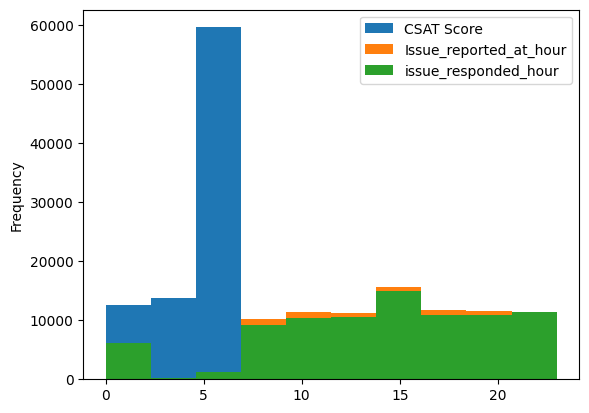

In [ ]:
data.plot(kind='hist')

In [ ]:
data.plot()

<Axes: >

In [ ]:
data.plot(kind='scatter', x='Issue_reported_at_hour', y='issue_responded_hour')

<Axes: xlabel='Issue_reported_at_hour', ylabel='issue_responded_hour'>

In [ ]:
# Set dark theme for Plotly
template = "plotly"
import plotly.express as px
# Visualize distribution of CSAT scores by agent shift interactively
csat_distribution_by_shift_fig = px.box(data, x='Agent Shift', y='CSAT Score', color='Agent Shift',
                                         title='Distribution of CSAT Scores by Agent Shift',
                                         labels={'Agent Shift': 'Agent Shift', 'CSAT Score': 'CSAT Score'},
                                         template=template)
csat_distribution_by_shift_fig.update_layout(
    xaxis=dict(title='Agent Shift'),
    yaxis=dict(title='CSAT Score'),
    font=dict(family='Arial', size=12, color='white')
)

# Show interactive graph
csat_distribution_by_shift_fig.show()

In [ ]:
# Distribution of CSAT scores
csat_distribution_fig = px.histogram(data, x='CSAT Score', title='Distribution of CSAT Scores',
                                     labels={'CSAT Score': 'CSAT Score'},
                                     color='CSAT Score', template=template)
csat_distribution_fig.update_layout(
    xaxis=dict(title='CSAT Score', tickmode='linear'),
    yaxis=dict(title='Count'),
    font=dict(family='Arial', size=12, color='white')
)

# Show interactive graph
csat_distribution_fig.show()

In [ ]:
# Pie chart of channel distribution
pie_chart_fig = px.pie(data, names='channel_name', title='Channel Distribution',
                       labels={'channel_name': 'Channel'},
                       template=template)
pie_chart_fig.update_layout(font=dict(family='Arial', size=12, color='white'))

# Show interactive graph
pie_chart_fig.show()

In [ ]:
# Time series line chart of CSAT scores over time
time_series_fig = px.line(data, x='Survey_response_Date', y='CSAT Score', title='CSAT Scores Over Time',
                           labels={'Survey_response_Date': 'Date', 'CSAT Score': 'CSAT Score'},
                           template=template)
time_series_fig.update_layout(font=dict(family='Arial', size=12, color='white'))

# Show interactive graph
time_series_fig.show()

In [ ]:
# Sunburst chart of category and sub-category distribution
sunburst_chart_fig = px.sunburst(data, path=['category', 'Sub-category'], title='Category and Sub-category Distribution',
                                 labels={'category': 'Category', 'Sub-category': 'Sub-category'},
                                 template=template)
sunburst_chart_fig.update_layout(font=dict(family='Arial', size=12, color='white'))

# Show interactive graph
sunburst_chart_fig.show()

In [ ]:
# Top agents by CSAT score bar chart
top_agents_csat_bar_fig = px.bar(data.groupby('Agent_name')['CSAT Score'].mean().reset_index().nlargest(10, 'CSAT Score'),
                                  x='Agent_name', y='CSAT Score', title='Top Agents by CSAT Score',
                                  labels={'Agent_name': 'Agent Name', 'CSAT Score': 'Average CSAT Score'},
                                  color='CSAT Score', template=template)
top_agents_csat_bar_fig.update_layout(font=dict(family='Arial', size=12, color='white'))

# Show interactive graph
top_agents_csat_bar_fig.show()

In [ ]:
# Agent tenure bucket distribution
tenure_bucket_dist_fig = px.histogram(data, x='Tenure Bucket', title='Agent Tenure Bucket Distribution',
                                       labels={'Tenure Bucket': 'Tenure Bucket'},
                                       color='Tenure Bucket', template=template)
tenure_bucket_dist_fig.update_layout(font=dict(family='Arial', size=12, color='white'))

# Show interactive graph
tenure_bucket_dist_fig.show()

In [ ]:
# CSAT scores by channel
csat_by_channel_fig = px.box(data, x='channel_name', y='CSAT Score',
                             title='CSAT Scores by Channel',
                             labels={'channel_name': 'Channel', 'CSAT Score': 'CSAT Score'},
                             color='channel_name', template=template)
csat_by_channel_fig.update_layout(
    xaxis=dict(title='Channel'),
    yaxis=dict(title='CSAT Score'),
    font=dict(family='Arial', size=12, color='white')
)

# Show interactive graph
csat_by_channel_fig.show()

### **Target Encoding**

In [ ]:
from category_encoders.target_encoder import TargetEncoder

columns = ['category', 'Sub-category', 'Agent_name', 'Supervisor']
for col in columns:
    encoder = TargetEncoder()
    df[col] = encoder.fit_transform(X=df[col], y=df['CSAT Score'])


In [ ]:
df.head()

category  Sub-category  Agent_name  Supervisor  CSAT Score  \
0  4.039816      4.252906    4.281369    4.170223           5   
1  4.039816      4.044023    4.512365    4.070175           5   
2  4.096059      3.883139    4.464643    4.196033           5   
3  4.346350      4.189468    3.994242    4.326467           5   
4  3.990506      3.921875    4.032264    4.116077           5   

   Issue_reported_at_hour  issue_responded_hour  Email  Inbound  Outcall  ...  \
0                      11                    11      0        0        1  ...   
1                      12                    12      0        0        1  ...   
2                      20                    20      0        1        0  ...   
3                      20                    21      0        1        0  ...   
4                      10                    10      0        1        0  ...   

   0-30  31-60  61-90  >90  On Job Training  Afternoon  Evening  Morning  \
0     0      0      0    0                1          0        0        1   
1     0      0      0    1                0          0        0        1   
2     0      0      0    0                1          0        1        0   
3     0      0      0    1                0          0        1        0   
4     1      0      0    0                0          0        0        1   

   Night  Split  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  

[5 rows x 26 columns]

## **Building a Model**

### *Linear Check*

In [ ]:
from scipy.stats import pearsonr
'''
Ho = There is no Linearity between Dependent and Independent Variables
Ha = There is Linearity between Dependent and Independent Variables
'''
alpha=0.05
for i in df.columns:
    pstat,pvalue=pearsonr(df[i],df['CSAT Score'])
    if pvalue<alpha:
        continue
    else:
        print(i,':Need to Drop')
        df.drop(columns=i,inplace=True)

issue_responded_hour :Need to Drop
Michael Lee :Need to Drop
0-30 :Need to Drop
Night :Need to Drop


* This are the columns that don't have linearity with target field, so we drop it.

* Multi-collinearity Check

In [ ]:
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(columns='CSAT Score',axis=1)
y = df['CSAT Score']
threshold = 10
default_vif = float('inf')
warnings.filterwarnings("ignore", message="divide by zero encountered in double_scalars")
while True:
    # Check if any VIF score is NaN (which will be caused by division by zero)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    # Handle division by zero
    vif_data.loc[vif_data['VIF'] == np.inf, 'VIF'] = default_vif

    high_vif_features = vif_data[vif_data["VIF"] > threshold]
    if high_vif_features.empty:
        break
    else:
        feature_to_drop = high_vif_features.iloc[0]['Feature']
        X = X.drop(columns=[feature_to_drop])
        print("Dropped column:", feature_to_drop)

Dropped column: Email
Dropped column: category
Dropped column: Sub-category
Dropped column: Agent_name
Dropped column: Supervisor
Dropped column: Issue_reported_at_hour
Dropped column: Inbound
Dropped column: Jennifer Nguyen


In [ ]:
X

Outcall  Emily Chen  John Smith  Olivia Tan  William Kim  31-60  61-90  \
0            1           0           0           0            0      0      0   
1            1           0           0           0            0      0      0   
2            0           0           0           0            1      0      0   
3            0           0           1           0            0      0      0   
4            0           0           0           0            0      0      0   
...        ...         ...         ...         ...          ...    ...    ...   
85902        0           0           0           0            1      0      0   
85903        0           1           0           0            0      0      0   
85904        0           0           0           1            0      0      0   
85905        0           0           0           1            0      0      0   
85906        0           0           0           0            0      0      0   

       >90  On Job Training  Afternoon  Evening  Morning  Split  
0        0                1          0        0        1      0  
1        1                0          0        0        1      0  
2        0                1          0        1        0      0  
3        1                0          0        1        0      0  
4        0                0          0        0        1      0  
...    ...              ...        ...      ...      ...    ...  
85902    0                1          0        0        1      0  
85903    1                0          0        0        1      0  
85904    0                1          0        1        0      0  
85905    1                0          0        0        1      0  
85906    0                1          0        1        0      0  

[85907 rows x 13 columns]

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scores = []

# Define the parameter grid and perform GridSearchCV
clf = GridSearchCV(
    DecisionTreeClassifier(),
    {
        'criterion': ['entropy', 'gini']
    },
    cv=5
)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini']})

In [ ]:
# Append the results to the scores list
scores.append({'model': 'DecisionTree', 'best_score': clf.best_score_ * 100, 'best_param': clf.best_params_})

In [ ]:
# Create a DataFrame from the scores list and print it
result_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_param'])
print(result_df)

          model  best_score                best_param
0  DecisionTree   69.372135  {'criterion': 'entropy'}


In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

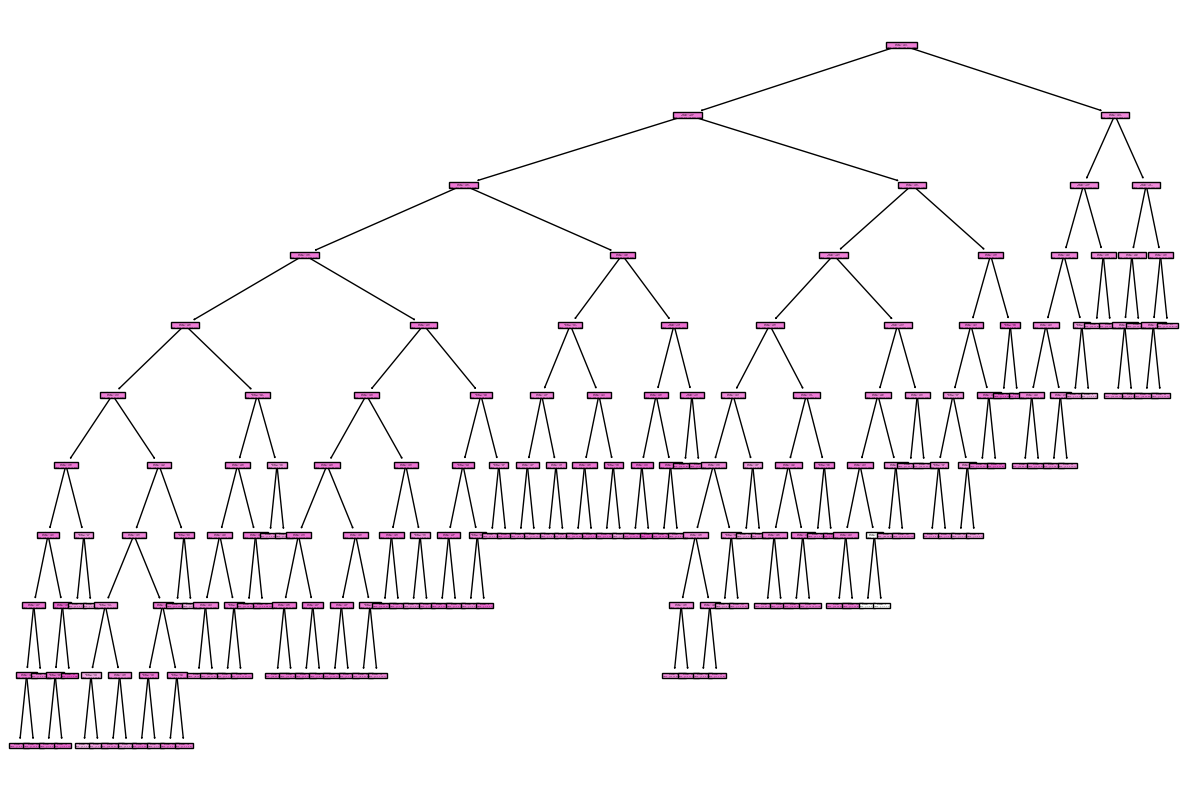

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=27)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [ ]:
y_test_pred=model.predict(X_test)
print('Accuracy:',round(accuracy_score(y_test,y_test_pred)*100,4),'%')

Accuracy: 69.4564 %


In [ ]:
model = LogisticRegression(penalty='l2',C=0.01,multi_class='ovr')
model.fit(X_train,y_train)

LogisticRegression(C=0.01, multi_class='ovr')

In [ ]:
y_test_pred=model.predict(X_test)
print('Accuracy:',round(accuracy_score(y_test,y_test_pred)*100,4),'%')

Accuracy: 69.4564 %


In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the base models
models = [
    ('decision_tree', DecisionTreeClassifier(criterion='entropy')),
    ('knn', KNeighborsClassifier(n_neighbors=27)),
    ('logistic_regression', LogisticRegression(penalty='l2', C=0.01, multi_class='ovr'))
]

In [ ]:
# Create the ensemble model
ensemble_model = VotingClassifier(estimators=models, voting='hard')


In [ ]:
# Fit the ensemble model
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('decision_tree',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('knn', KNeighborsClassifier(n_neighbors=27)),
                             ('logistic_regression',
                              LogisticRegression(C=0.01, multi_class='ovr'))])

In [ ]:
# Predict with the ensemble model
y_test_pred = ensemble_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 4)
print('Accuracy:', accuracy, '%')

Accuracy: 69.4564 %
